In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/churn.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
remove_features = ["CustomerId", "Surname", "RowNumber"]


In [ ]:

 df.drop(remove_features, axis = 1, inplace = True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.32611934744779114
Test MSE score: 0.1063975


CreditScore          0.139535
Age                  0.228821
Tenure               0.068855
Balance              0.152245
NumOfProducts        0.120989
HasCrCard            0.014773
IsActiveMember       0.062572
EstimatedSalary      0.153415
Geography_Germany    0.024079
Geography_Spain      0.013499
Gender_Male          0.021216
dtype: float64


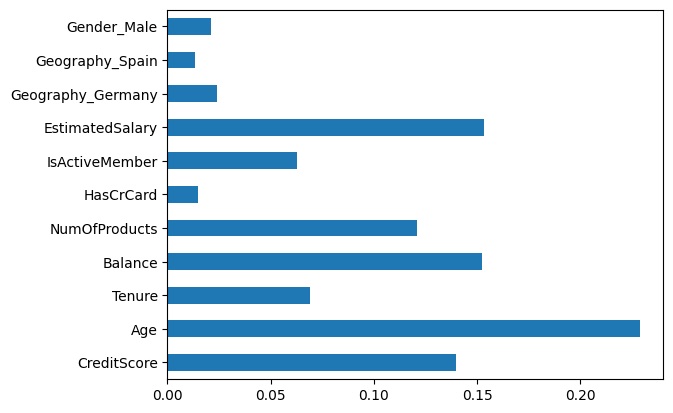

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

OOB R2 score: 0.3131851819727236
OOB MSE score: 0.1121360836356089
CreditScore          0.139535
Age                  0.228821
Tenure               0.068855
Balance              0.152245
NumOfProducts        0.120989
HasCrCard            0.014773
IsActiveMember       0.062572
EstimatedSalary      0.153415
Geography_Germany    0.024079
Geography_Spain      0.013499
Gender_Male          0.021216
dtype: float64


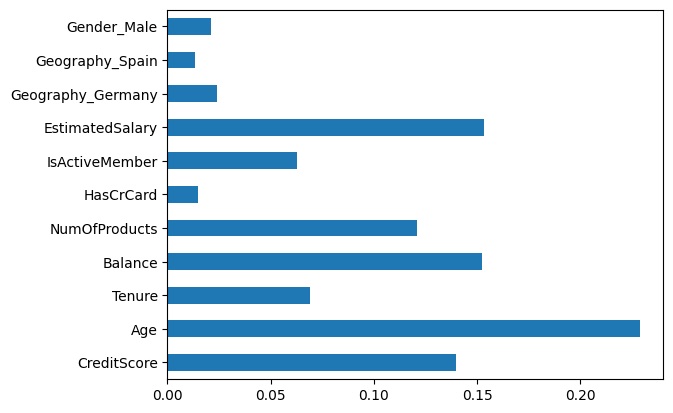

In [ ]:
# RF Model
rf_modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(X_train, y_train)

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_))

# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 20]
    #,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
print(scoring)


{'R2': 'r2', 'MSE': 'neg_mean_squared_error'}


In [ ]:
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [5, 10, 15, 20]}, refit='R2',
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [ ]:

y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.2787676688026778
Test MSE score: 0.11387375


In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))


Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.3047591723051727
Best MSE score: 0.1134378125


CreditScore          0.139578
Age                  0.226171
Tenure               0.070909
Balance              0.152023
NumOfProducts        0.119589
HasCrCard            0.015562
IsActiveMember       0.064018
EstimatedSalary      0.150751
Geography_Germany    0.024811
Geography_Spain      0.014008
Gender_Male          0.022581
dtype: float64


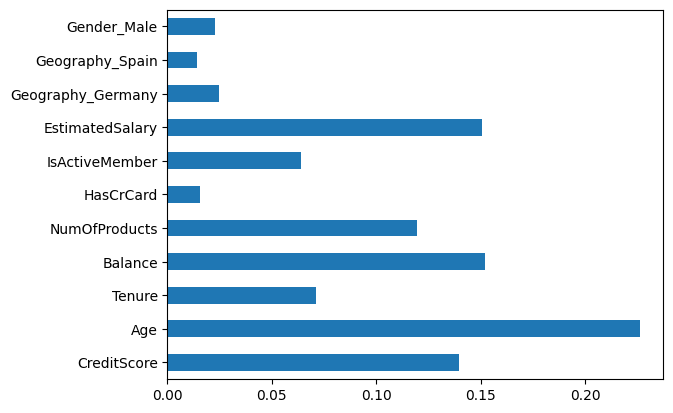

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

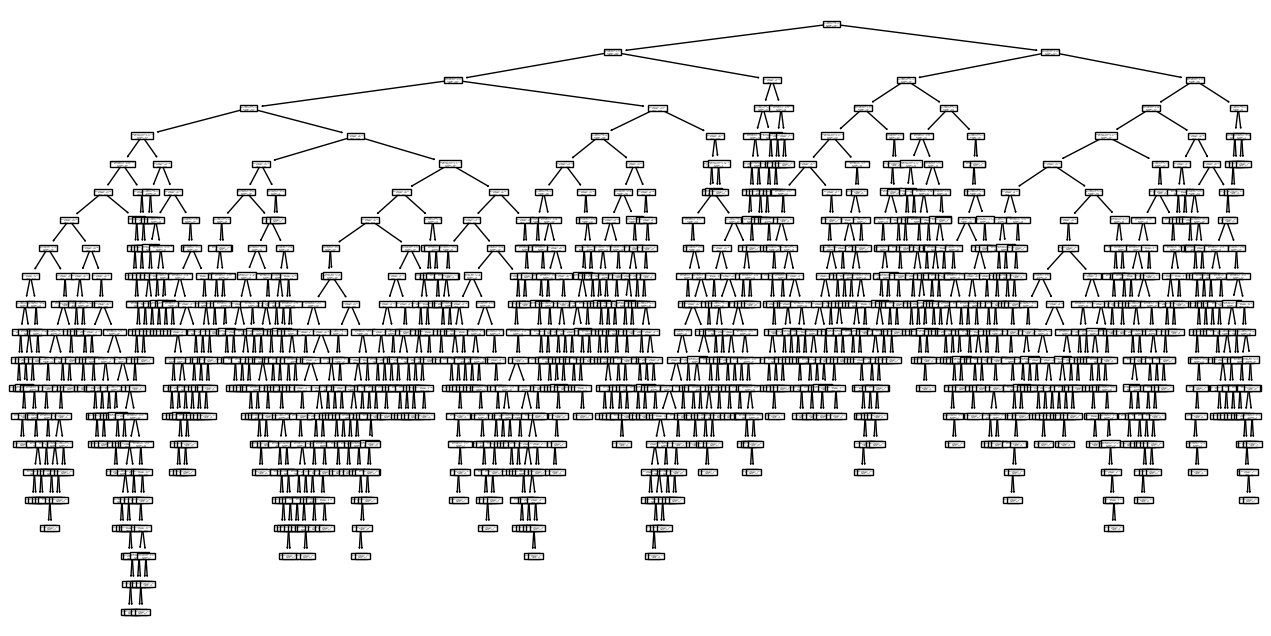

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Test R2 score: 0.2787676688026778
Test MSE score: 0.11387375


Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.3047591723051727
Best MSE score: 0.1134378125


OOB score: 0.23993039882082834
OOB MSE score: 0.12409637376712306
OOB R2 score: 0.23993039882082834


Feature importances based on OOB:
CreditScore          0.139578
Age                  0.226171
Tenure               0.070909
Balance              0.152023
NumOfProducts        0.119589
HasCrCard            0.015562
IsActiveMember       0.064018
EstimatedSalary      0.150751
Geography_Germany    0.024811
Geography_Spain      0.014008
Gender_Male          0.022581
dtype: float64


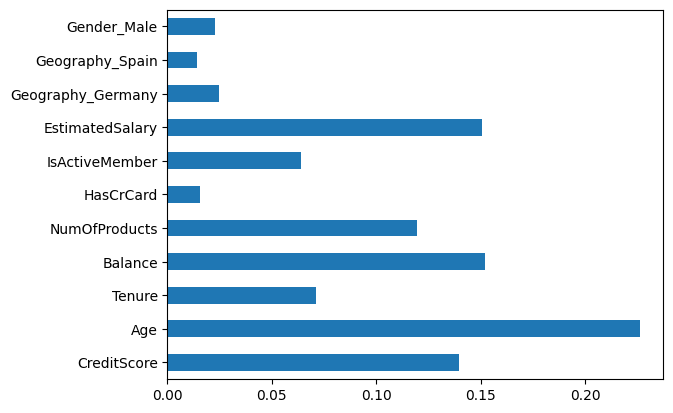

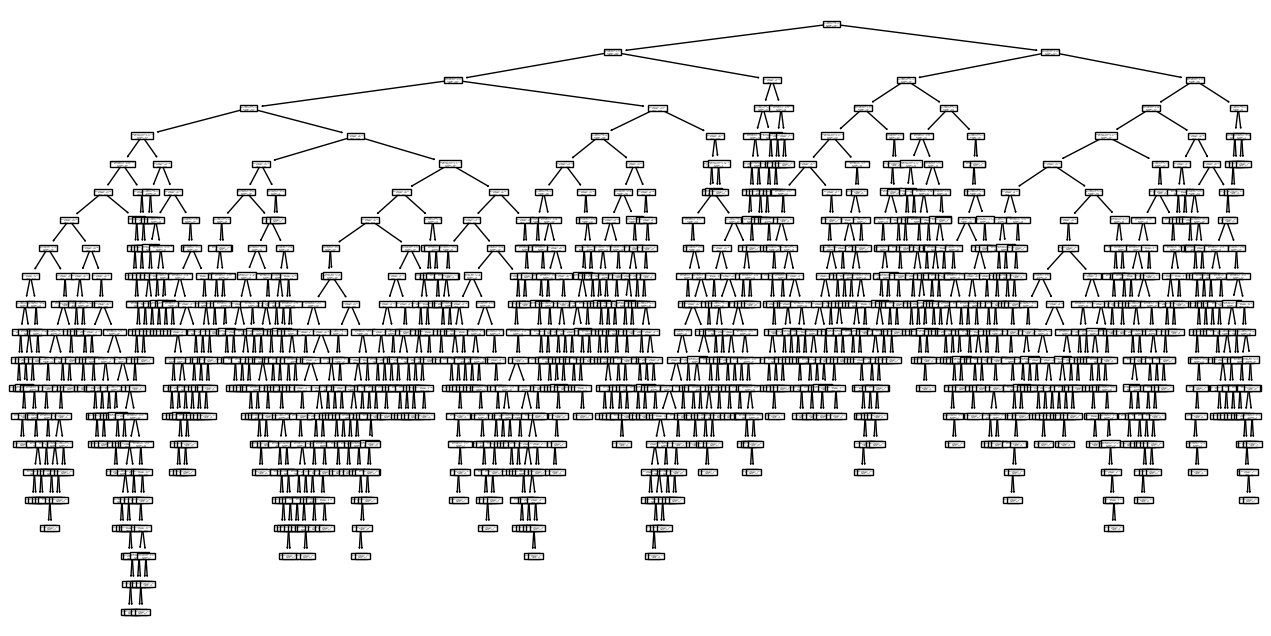

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('\n')

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('\n')

# Display OOB score and related statistics
print('OOB score:', grid_search.best_estimator_.oob_score_)
oob_predictions = grid_search.best_estimator_.oob_prediction_
print('OOB MSE score:', mean_squared_error(y_train, oob_predictions))
print('OOB R2 score:', r2_score(y_train, oob_predictions))
print('\n')

# Obtain feature importances and plot them
importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances based on OOB:')
print(importances_oob)
importances_oob.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 20}
Best R2 score: 0.3047591723051727
Best MSE score: 0.1134378125


Test R2 score: 0.2787676688026778
Test MSE score: 0.11387375


Feature importances:
CreditScore          0.139578
Age                  0.226171
Tenure               0.070909
Balance              0.152023
NumOfProducts        0.119589
HasCrCard            0.015562
IsActiveMember       0.064018
EstimatedSalary      0.150751
Geography_Germany    0.024811
Geography_Spain      0.014008
Gender_Male          0.022581
dtype: float64


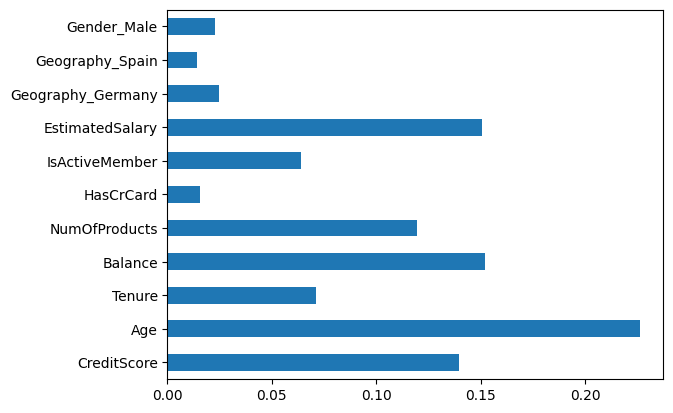

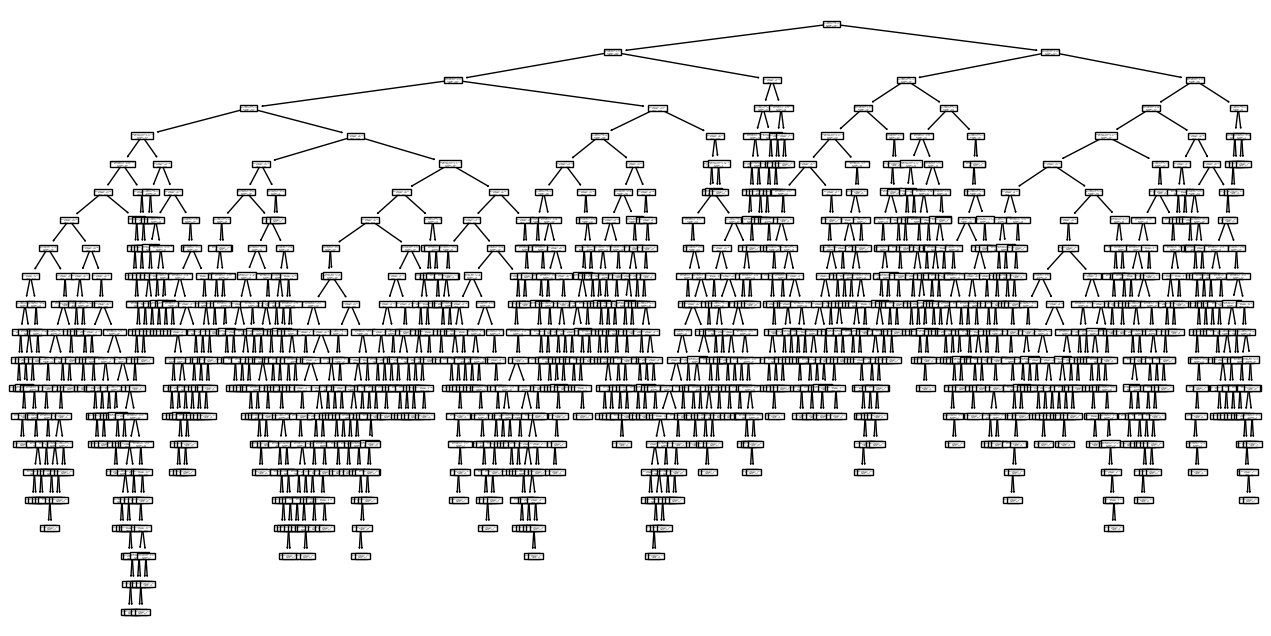

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Perform random search with cross-validation; hence, create random search object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=20, cv=5, scoring=scoring, refit='R2')

# fit the random search object to the train data
random_search.fit(X_train, y_train)

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', random_search.best_params_)
print('Best R2 score:', random_search.best_score_)
print('Best MSE score:', abs(random_search.cv_results_['mean_test_MSE'][random_search.best_index_]))
print('\n')

# fit the model with the best parameters on the entire training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test R2 score:", r2_score(y_test, y_pred))
print("Test MSE score:", mean_squared_error(y_test, y_pred))
print('\n')

# Obtain feature importances and plot them
importances = pd.Series(random_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances:')
print(importances)
importances.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(random_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [ ]:
df = pd.read_csv("/content/churn.csv")